In [13]:
# from google.colab import drive
# drive.mount("/content/gdrive")
!pip install tensorflow

In [91]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [105]:

PATH = "../Rusantara-Dataset/CleanData/CleanData"

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

BATCH_SIZE = 32
IMG_SIZE = (160, 160)

train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 359 files belonging to 3 classes.


In [106]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 104 files belonging to 3 classes.


In [60]:
# train_data_dir = "../Rusantara-Dataset/rusantara2"

# BATCH_SIZE = 32
# IMG_SIZE = (160, 160)

# train_datagen = ImageDataGenerator(rescale=1./255,
#                                    rotation_range=40,
#                                    width_shift_range=0.2,
#                                    height_shift_range=0.2,
#                                    shear_range=0.2,
#                                    zoom_range=0.2,
#                                    horizontal_flip=True,
#                                    validation_split=0.2) # set validation split

# train_generator = train_datagen.flow_from_directory(
#     train_data_dir,
#     target_size=IMG_SIZE,
#     batch_size=BATCH_SIZE,
#     class_mode='binary',
#     subset='training') # set as training data

# validation_generator = train_datagen.flow_from_directory(
#     train_data_dir, # same directory as training data
#     target_size=IMG_SIZE,
#     batch_size=BATCH_SIZE,
#     class_mode='binary',
#     subset='validation') # set as validation data

# # test_datagen = ImageDataGenerator(rescale = 1./255)

# # test_generator = test_datagen.flow_from_directory(
# #     "../Rusantara-Dataset/CleanData/CleanData")

Found 403 images belonging to 3 classes.
Found 98 images belonging to 3 classes.


In [61]:
# val_batches = tf.data.experimental.cardinality(validation_dataset)
# test_dataset = validation_dataset.take(val_batches // 5)
# validation_dataset = validation_dataset.skip(val_batches // 5)

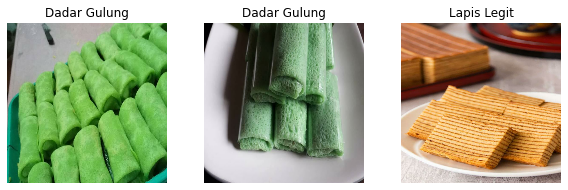

In [108]:
# class_names = ["Dadar Gulung", "Kue Lemper", "Lapis Legit", "Lupis", "Onde-Onde", "Serabi"]
# class_names = ["Dadar Gulung", "Lapis Legit", "Onde-Onde"]

class_names = train_dataset.class_names


plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(3):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
    
# plt.figure(figsize=(15,15))
# for i in range(6):
#     plt.subplot(330 + 1 + i)
#     batch = train_generator.next()[0]*255
#     image = batch[0].astype('uint8')
#     plt.imshow(image)
# plt.show()

# x,y = train_dataset
# for i in range(0,4):
#     image = x[i]
#     label = y[i]
#     label = np.argmax(label)
#     plt.title(class_names[label])
#     plt.imshow(image)
#     plt.show()

# train_generator.classes()

In [137]:
print(class_names)

['Dadar Gulung', 'Lapis Legit', 'Onde-Onde']


plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(3):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [109]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

In [110]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [111]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(160, 160, 3),
                                               include_top=False,
                                               weights='imagenet')

In [112]:
prediction_layer = tf.keras.layers.Dense(6)

In [113]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [118]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [119]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 160, 160, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, 160, 160, 3)       0         
                                                                 
 tf.math.truediv_2 (TFOpLamb  (None, 160, 160, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_2 (TFOpLam  (None, 160, 160, 3)      0         
 bda)                                                            
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                           

In [120]:
initial_epochs = 15

loss0, accuracy0 = model.evaluate(validation_dataset)

4/4 [==============================] - 6s 576ms/step - loss: 2.9085 - accuracy: 0.2788


In [121]:
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/15
12/12 [==============================] - 49s 3s/step - loss: 2.2103 - accuracy: 0.5905 - val_loss: 0.3107 - val_accuracy: 0.9038
Epoch 2/15
12/12 [==============================] - 37s 3s/step - loss: 0.2867 - accuracy: 0.8802 - val_loss: 0.0244 - val_accuracy: 0.9904
Epoch 3/15
12/12 [==============================] - 40s 3s/step - loss: 0.0899 - accuracy: 0.9777 - val_loss: 0.0337 - val_accuracy: 0.9904
Epoch 4/15
12/12 [==============================] - 39s 3s/step - loss: 0.1001 - accuracy: 0.9721 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 5/15
12/12 [==============================] - 35s 3s/step - loss: 0.0172 - accuracy: 0.9972 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 6/15
12/12 [==============================] - 38s 3s/step - loss: 0.0151 - accuracy: 0.9916 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 7/15
12/12 [==============================] - 36s 3s/step - loss: 0.0123 - accuracy: 0.9944 - val_loss: 0.0635 - val_accuracy: 0.9904
Epoch 8/15
12/12 [==

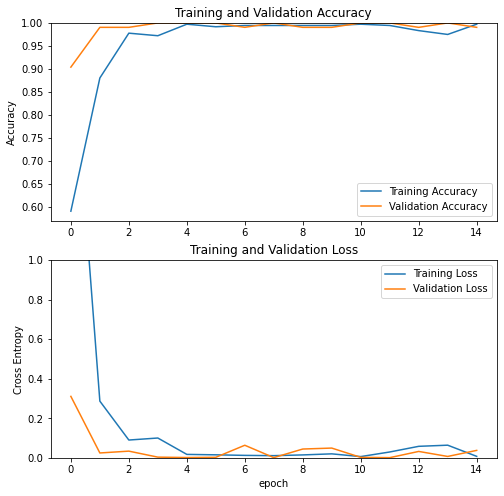

In [122]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [123]:
base_model.trainable = True

In [124]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  154


In [125]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

In [126]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 160, 160, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, 160, 160, 3)       0         
                                                                 
 tf.math.truediv_2 (TFOpLamb  (None, 160, 160, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_2 (TFOpLam  (None, 160, 160, 3)      0         
 bda)                                                            
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                           

In [128]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 15/25
12/12 [==============================] - 36s 2s/step - loss: 0.0028 - accuracy: 0.9972 - val_loss: 0.0182 - val_accuracy: 0.9904
Epoch 16/25
12/12 [==============================] - 21s 2s/step - loss: 1.3005e-04 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 17/25
12/12 [==============================] - 21s 2s/step - loss: 0.0160 - accuracy: 0.9972 - val_loss: 8.9960e-06 - val_accuracy: 1.0000
Epoch 18/25
12/12 [==============================] - 21s 2s/step - loss: 3.8211e-04 - accuracy: 1.0000 - val_loss: 1.4728e-05 - val_accuracy: 1.0000
Epoch 19/25
12/12 [==============================] - 21s 2s/step - loss: 1.6069e-04 - accuracy: 1.0000 - val_loss: 2.9188e-05 - val_accuracy: 1.0000
Epoch 20/25
12/12 [==============================] - 21s 2s/step - loss: 2.0767e-06 - accuracy: 1.0000 - val_loss: 3.0282e-05 - val_accuracy: 1.0000
Epoch 21/25
12/12 [==============================] - 21s 2s/step - loss: 2.1549e-05 - accuracy: 1.0000 - val_loss: 1.9487e

In [129]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

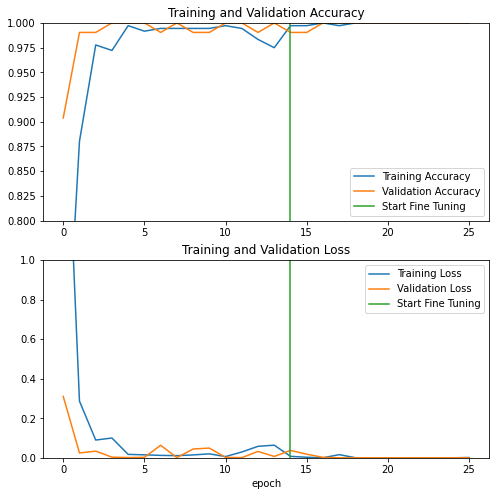

In [130]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [24]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

NameError: name 'test_dataset' is not defined

In [138]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img


path = "../Rusantara-Dataset/dadargulung3.jpeg"
# path = validation_generator[0]
img = load_img(path, target_size=(160, 160))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = probability_model.predict(images, batch_size=32)
print(path)
print(classes)
i = np.argmax(classes[0])
print(class_names[i])

1/1 [==============================] - 0s 76ms/step
../Rusantara-Dataset/dadargulung3.jpeg
[[1.0000000e+00 3.9427944e-10 2.1724462e-08 8.4366891e-10 5.3770249e-10
  8.1344612e-11]]
Dadar Gulung


In [139]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

### Confusion Matrix
from sklearn.metrics import confusion_matrix
predictions = model.predict(x_test, steps=len(x_test), verbose=0)
#y_pred=model.predict(x_test)
#y_pred = np.round(y_pred)
y_pred = np.argmax(predictions, axis=-1)

y_true=np.argmax(y_test, axis=-1)

cm = confusion_matrix(y_true, y_pred)

## Get Class Labels

class_names = class_names = ["Dadar Gulung", "Kue Lemper", "Lapis Legit", "Lupis", "Onde-Onde", "Serabi"]

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

plt.savefig('ConMat24.png')
plt.show()

NameError: name 'x_test' is not defined